https://qiita.com/yoshihara0512/items/ffa00bb50a7f38bbc60d

https://www.insource.co.jp/python-gakuin/mail-backnumber/vol21.html

In [1]:
import requests
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome import service as fs
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import os
import time

# CHROMEDRIVER = "./chromedriver.exe"
# chrome_service = fs.Service(executable_path=CHROMEDRIVER)
chrome_service = fs.Service(ChromeDriverManager().install())
browser = webdriver.Chrome(service=chrome_service)

# Google画像検索のURLを指定
url = "https://www.google.co.jp/imghp?hl=ja"
browser.get(url)


In [2]:
# 検索キーワードを入力するHTML要素を取得
from selenium.webdriver.common.by import By
form = browser.find_element(By.XPATH, '//*[@id="APjFqb"]')

# 検索キーワードを指定
from selenium.webdriver.common.keys import Keys
actor_name = input("画像検索のキーワードを入力してください。：")

# ブラウザに検索キーワードを投入
form.send_keys(str(actor_name))
form.send_keys(Keys.ENTER)


skip: /logos/doodles/2024/paris-games-conclude-6753651837110568-shs.png
skip: /logos/doodles/2024/paris-games-conclude-6753651837110568-shs.png
skip: /logos/doodles/2024/paris-games-conclude-6753651837110568-s.png
skip: 
skip: 
skip: 
skip: 
skip: 
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
skip: data:image/gif;base64,R0lGODlhAQA
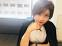
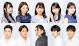
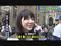
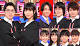
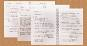
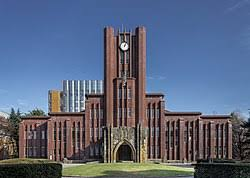
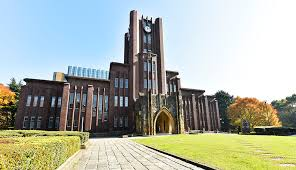
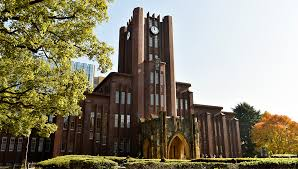
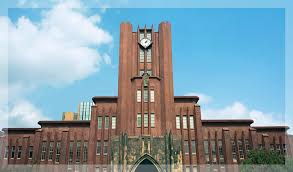
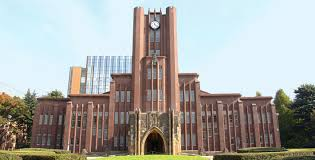
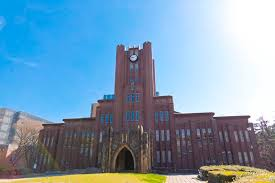
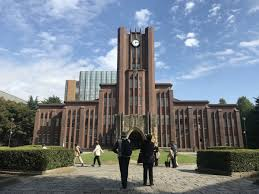
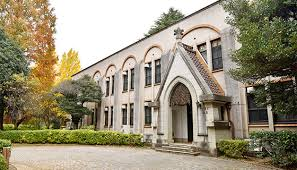
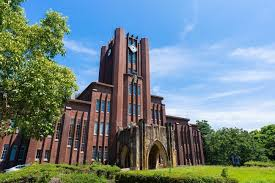
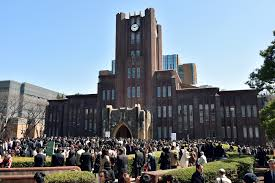
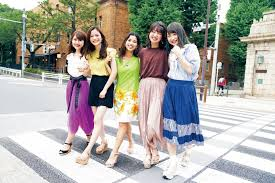
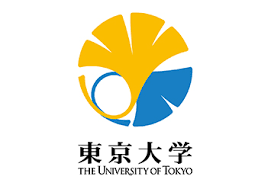
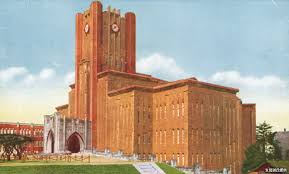
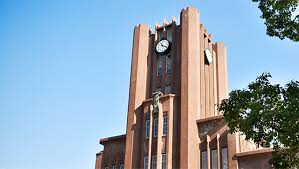
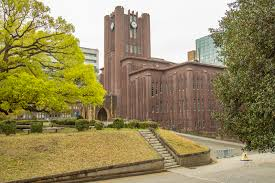
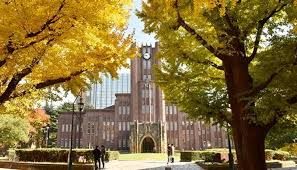
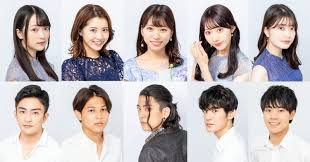
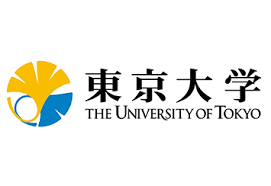
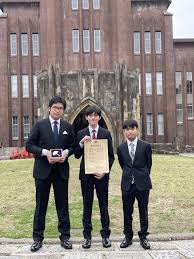
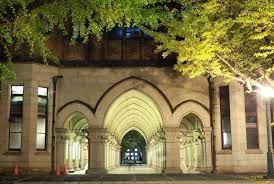
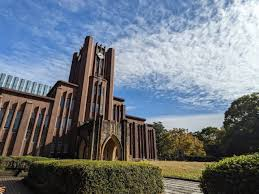
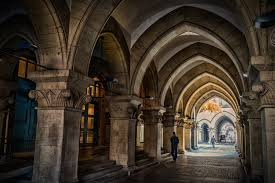
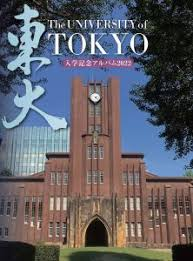
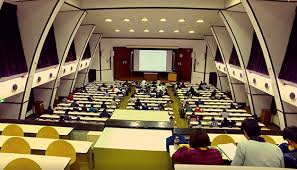
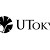
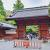
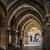
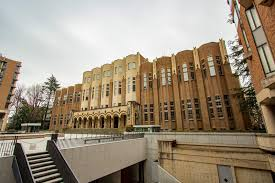
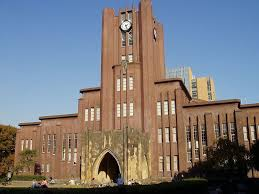
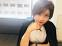
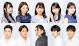
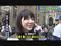
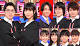
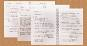
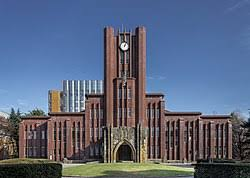
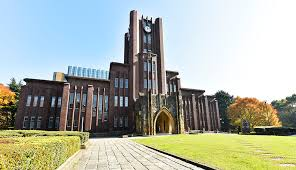
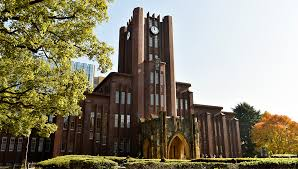
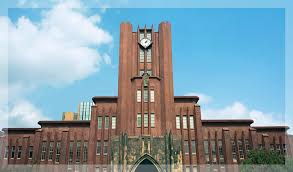
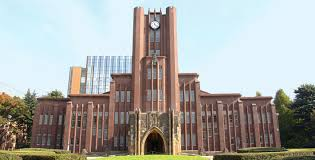
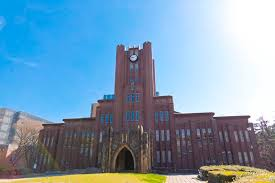
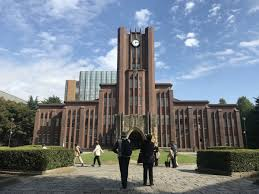
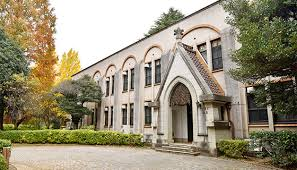
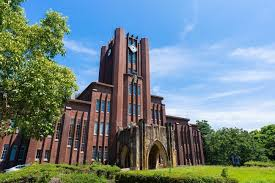
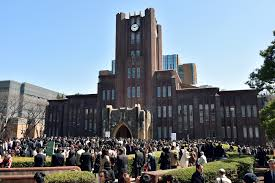
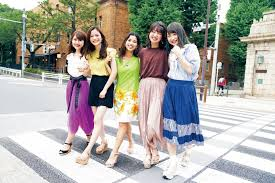
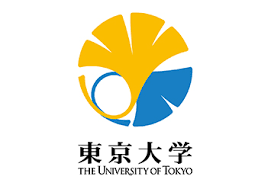
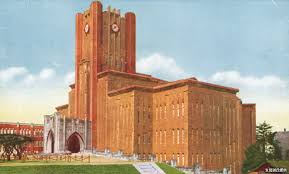
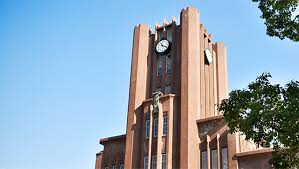
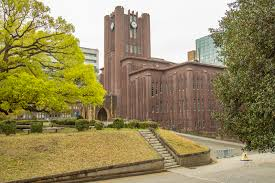
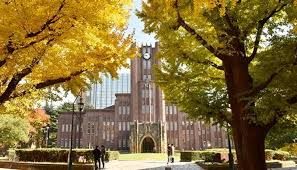
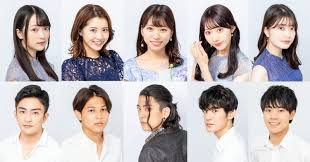
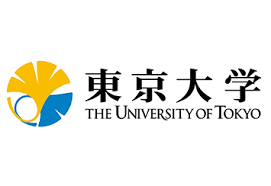
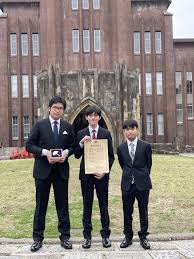
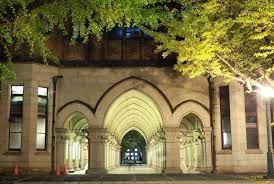
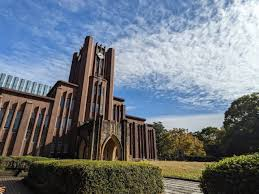
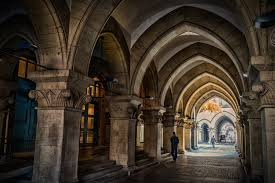
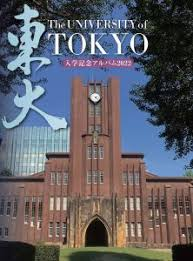
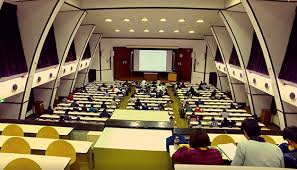
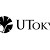
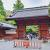
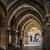
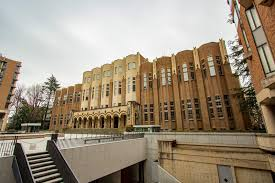
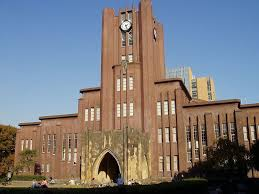

In [3]:
# 画像検索したページのURLを取得する
cur_url = browser.current_url
res = requests.get(cur_url)
time.sleep(3)

# 取得する画像の枚数を設定
img_limit = 40
img_count = 0

#画面のスクロールを行う。
try:

    img_urls = []
    # 画面を5回スクロール(スクロールしないと20枚しか取得できない)
    for i in range(5):
        # 画面をスクロール
        browser.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        # BeautifulSoupを読み込み
        soup = BeautifulSoup(browser.page_source , "html.parser")

        # imgタグのHTML要素を全て取得する
        for image in soup.find_all("img"):
            # 画像の取得上限を超えたら終了
            if img_count >= img_limit:
                break
            
            try:
                url = image.get("data-src")

                if url is None:
                    url = image.get("src")

                if url is not None:
                    # ファビコンやpng、svgなどの場合はスキップ
                    if ('favicon' in url) or ('.png' in url) or ('.svg' in url) or ('data:image/' in url):
                        print(f"skip: {url}")
                        continue
                    if url in img_urls:
                        continue
                    img_urls.append(url)
                    img_count += 1
            except:
                print("画像のURL取得に失敗しました。")
        sleep(2)
        
except Exception:
    print("画面スクロールに失敗しました。")


In [4]:
# 保存先のディレクトリ
dl_dir = "images"

# ダウンロードディレクトリが存在しない場合は作成
if not os.path.exists(dl_dir):
    os.mkdir(dl_dir)

# フォルダ数のカウント(連番用)
dir_count = 0
files = os.listdir(dl_dir)
for f in files:
    path = os.path.join(dl_dir, f)
    if os.path.isdir(path):
        dir_count += 1
        
# 連番を付与して画像検索キーワードと同名のディレクトリ名を生成
save_dir = os.path.join(dl_dir, str(dir_count) + "_" + actor_name)

# サブディレクトリが存在しない場合は作成
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    
# 取得した画像のデータを保存する    
file_number = 1
for elem_url in img_urls:
    try:

        r = requests.get(elem_url)
        with open(save_dir + "/" + str(actor_name) + "_" + str(file_number) + ".jpg","wb") as fp:
            fp.write(r.content)
        file_number += 1
        sleep(0.1)
    except:
        pass

